<a href="https://colab.research.google.com/github/christoforou/CUS1166_Project_Template/blob/master/DeepCNN_for_EEG_2021/DeepCNN_for_RAN_Analysis_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright Statement: Copyright © 2020 Christoforou. These Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.

**Author:** Dr. Christoforos Christoforou 

###Setup Kaggle CLI
This section configures the kaggle CLI, which allows us to download dataset from kaggle programmatically. To use the API, you need to have a kaggle account, and set up an kaggle API key. Instruction on how to create the API key are available [here](https://www.ankushchoubey.com/download_kaggle/). The kaggle API key would be stored in a file called `kaggle.json`; make sure you securly save this file and treat it as a password. 

Once you have your kaggle API key, execute the cells below to install Kaggle CLI and download the detaset. 

In [10]:
!pip install -q kaggle

In [11]:
# Upload the kaggle API key of your account.
# See https://www.ankushchoubey.com/download_kaggle/ on how to create a API key for your account. 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cchristoforou","key":"f150ecfecf2c51bbdcb1985bd2c375d3"}'}

In [12]:
# Setup local permission to kaggle API file. 
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
!kaggle datasets download -d cchristoforou/ran-dataset-preprocessed
!mkdir sample_data/RAN
!unzip ran-dataset-preprocessed.zip -d sample_data/RAN

 98% 320M/328M [00:01<00:00, 160MB/s]
100% 328M/328M [00:02<00:00, 172MB/s]
Archive:  ran-dataset-preprocessed.zip
  inflating: sample_data/RAN/RAN_DATA_sample.dat  


### Load the RAN data

`X_d` : `shape (64, 180, 4068)` stores the pre-processed EEG data epochs. There are 4068 epochs, each observation is a matrix of `(64,180)`. The 64 correspond to the number of channels (i.e. EEG sensores) and `180` correspond to the time samples. So each epoch/observation is a matrix that captures the spatio-temporal characteristics o the brain activity.

`labels_group`: `shape (4068,)` stores label information as to the underlying group the participant generating the epoch belong to. In this case, groups correspond to `CHILDREN WITH DYSLEXIA` and `TYPICALLY DEVELOPING CHILDREN`.

`labels_subject_id`: `shape (4068,)` stores the id information of the participant that generated the epoch. This sample dataset provides data from only 10 participants.

`labels_condition`: `shape (4068,)` stores label information about the condition of the underlying stimuli for which each epoch was observed. There are a total of four labels denoted by the numbers `1,2,3,4`, and correspond to the following labels:
  - 1:  `Rime-confusable`
  - 2:  `Rime-Non-confusable`
  - 3:  `Visual-confusable`
  - 4:  `Visual-Non-confusable`

`times` : `shape (180,)` a vector that stores the timing of each sample, relative to the epoch onset, in milliseconds. 

In [25]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# Load pickle data from file 
import pickle
PIK = "./sample_data/RAN/RAN_DATA_sample.dat"

with open(PIK, "rb") as f:
  [X_d, labels_group, labels_subject_id, labels_condition, times] = pickle.load(f)

### Some code to visualize the data.


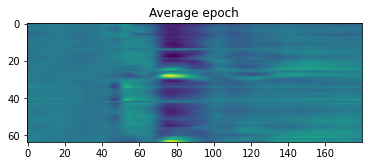

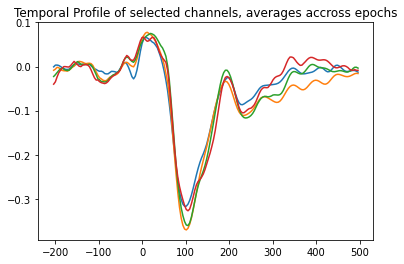

In [28]:

# Visualize the average FRP accross all trials in X_d 
X_mean = np.nanmean(X_d[:,:,:],axis=2)
plt.imshow(X_mean)
plt.title('Average epoch')
plt.show() 

 
plt.plot(times,X_mean[10:14,:].T)
plt.title('Temporal Profile of selected channels, averages accross epochs')
plt.show()
